In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Loading / Preprocessing

In [3]:
df =pd.read_csv('student-mat-pass-or-fail.csv',na_values= "")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass
0,1,1,18,1,0,0,4,4,2,2,...,3,4,1,1,3,6,5,6,6,0
1,1,1,17,1,0,1,1,1,1,2,...,3,3,1,1,3,4,5,5,6,0
2,1,1,15,1,1,1,1,1,1,2,...,3,2,2,3,3,10,7,8,10,1
3,1,1,15,1,0,1,4,2,1,3,...,2,2,1,1,5,2,15,14,15,1
4,1,1,16,1,0,1,3,3,1,2,...,3,2,1,2,5,4,6,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,1,0,2,2,1,2,...,5,4,4,5,4,11,9,9,9,0
391,0,0,17,1,1,1,3,1,2,1,...,4,5,3,4,2,3,14,16,16,1
392,0,0,21,0,0,1,1,1,1,1,...,5,3,3,3,3,3,10,8,7,0
393,0,0,18,0,1,1,3,2,3,1,...,4,1,3,4,5,0,11,12,10,1


In [4]:
df.shape

(395, 30)

# Find and drop the missing values in the data frame

In [5]:
df.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
pass          int64
dtype: object

In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
pass          0
dtype: int64

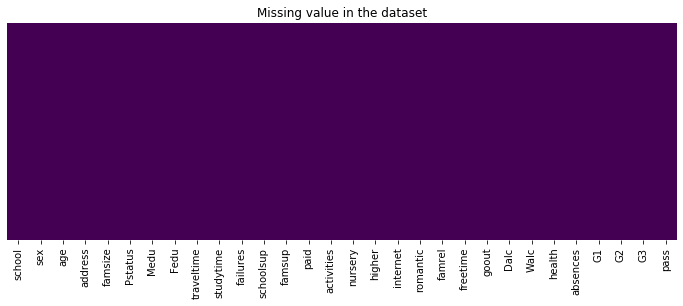

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

# Data Visualization

In this method, we investigate the correlation to matrix to verify that we don't have extreme values of correlation and neither have 0 correlations amongst the values outside the main diagonal of the matrix.

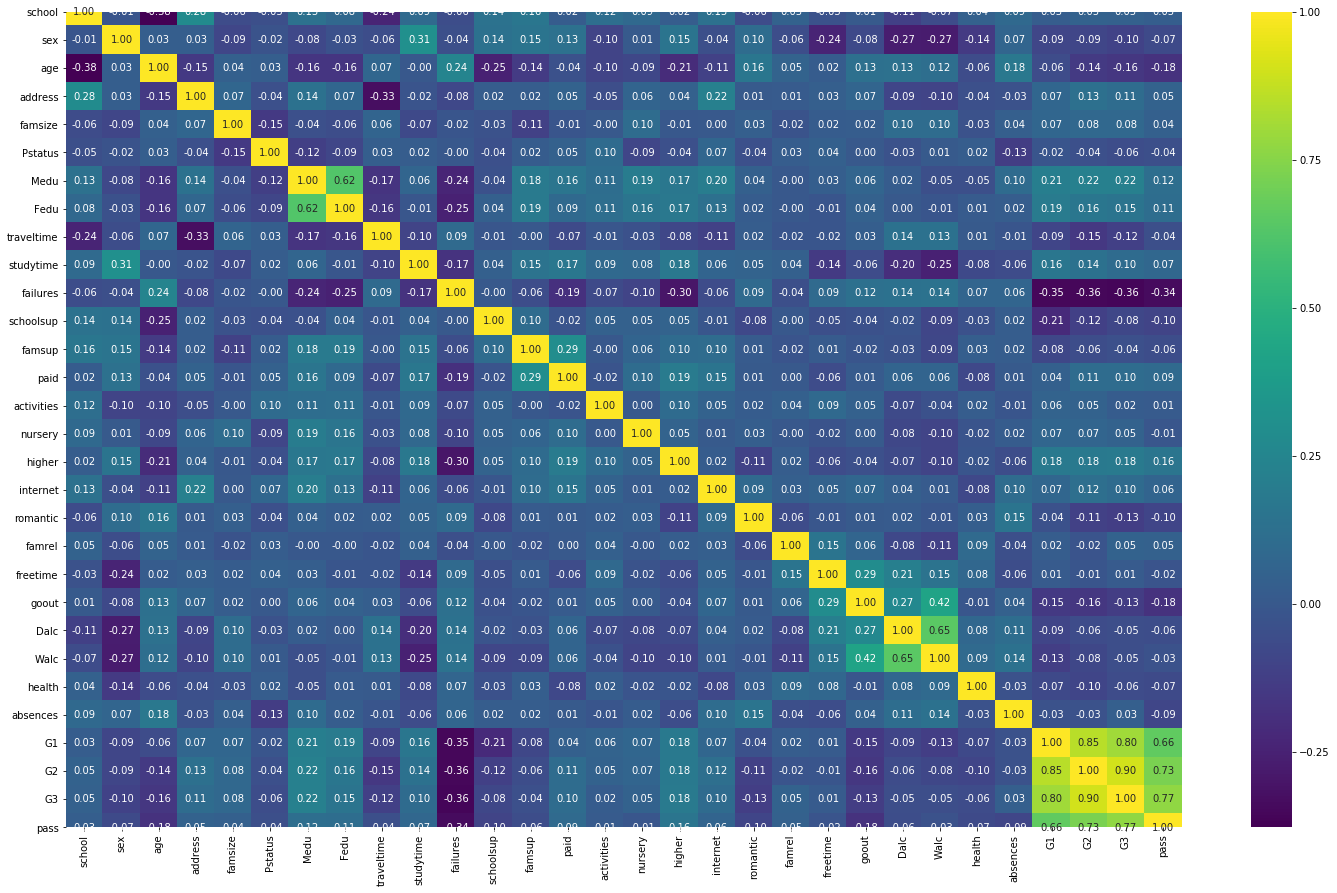

In [8]:
# correlation Matrix

corr = df.corr()
fig, ax = plt.subplots(figsize=(25, 15))

ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", ax=ax)
plt.show()

We can see from the correlation matrix that we have several small-moderate sized correlations.

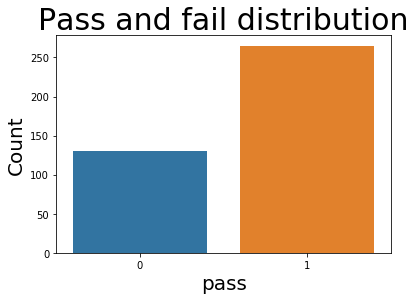

In [9]:
b = sns.countplot(df['pass'])
b.axes.set_title('Pass and fail distribution', fontsize = 30)
b.set_xlabel('pass', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

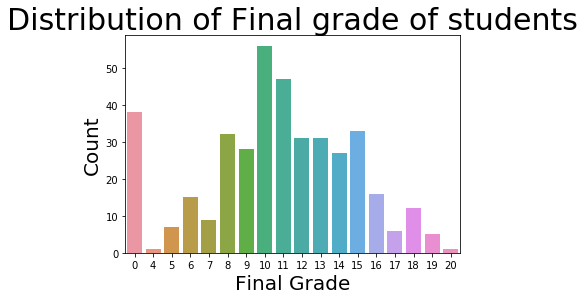

In [10]:
b = sns.countplot(df['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

Does age have anything to do with the final grade?

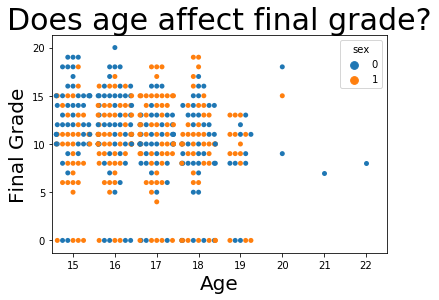

In [11]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=df)
b.axes.set_title('Does age affect final grade?', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

There seems to be no clear relation of age or gender with final grade.

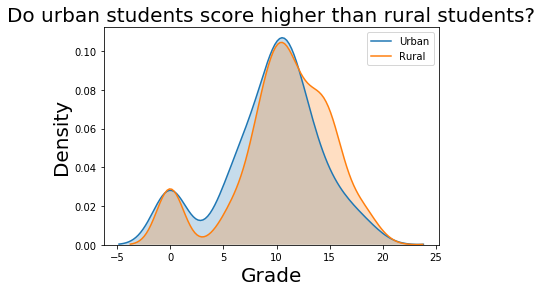

In [12]:
#student's home address type (binary: 'U' - urban or 'R' - rural) 
#(bool: 1 if it's U else 0)
sns.kdeplot(df.loc[df['address'] == 0, 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 1, 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

The graph shows that on there is not much difference between the scores based on location.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

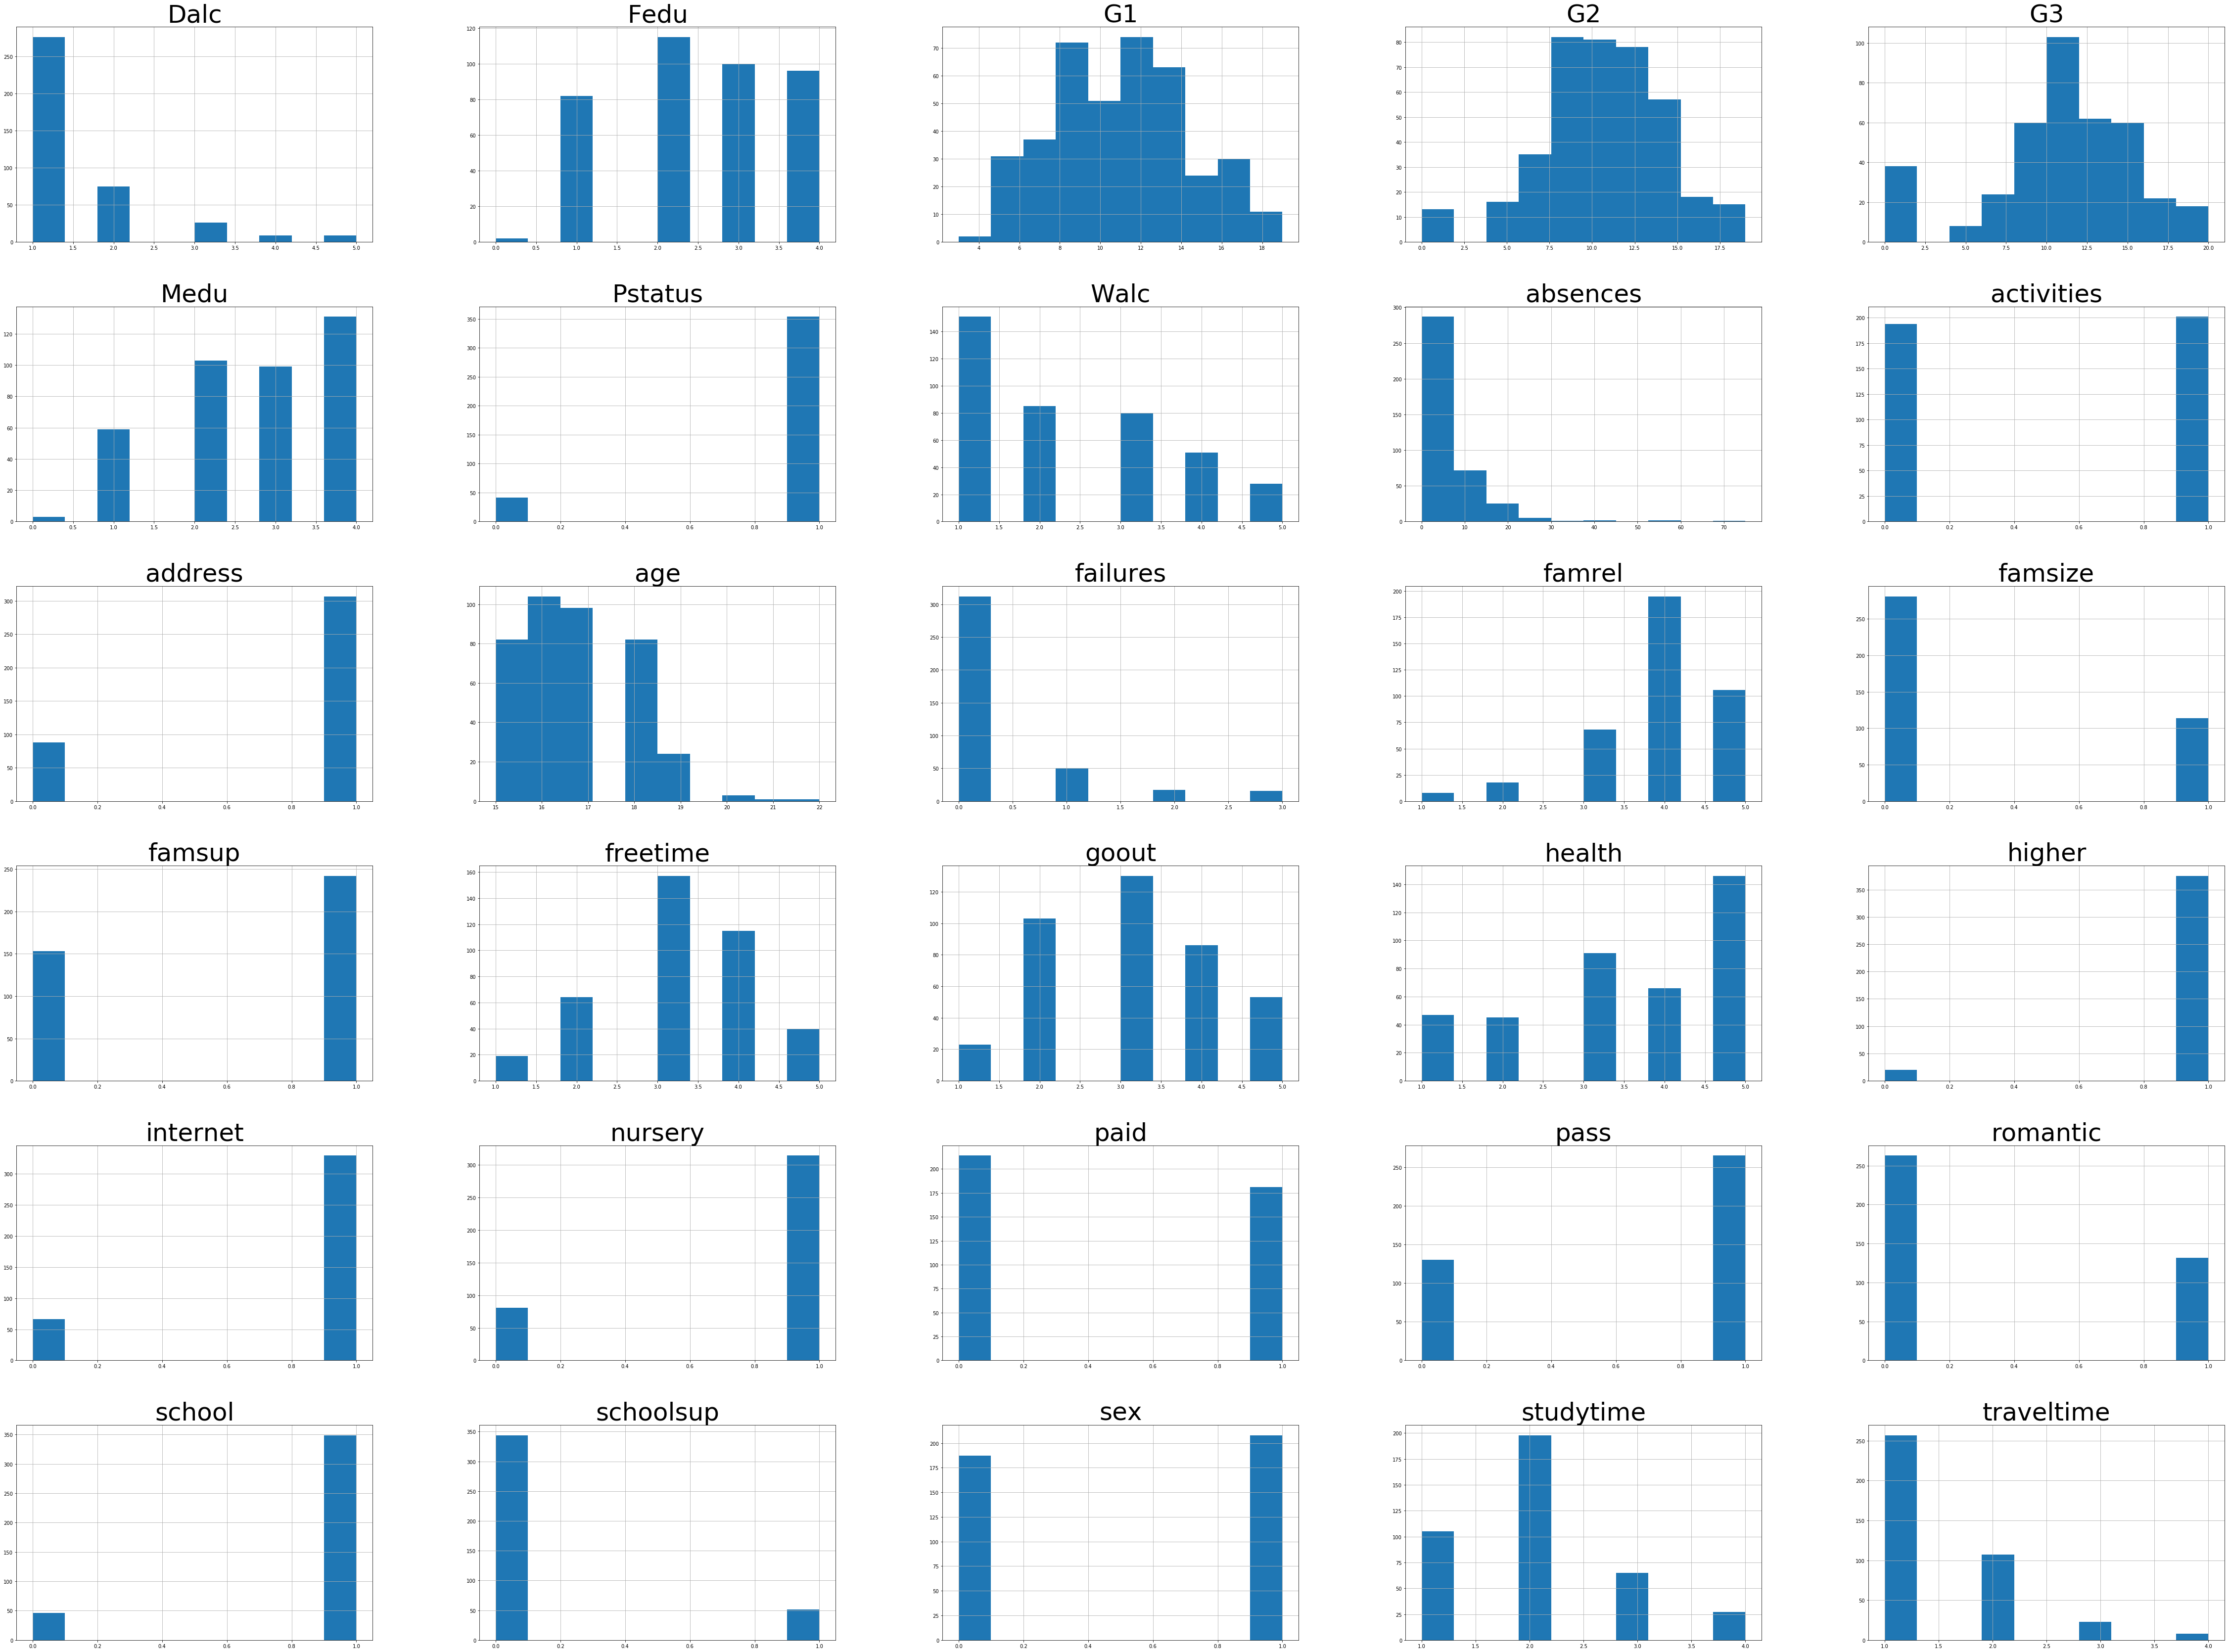

In [13]:
fig = df.hist(bins = 10, figsize=(80, 60)) 
[x.title.set_size(50) for x in fig.ravel()] 

We can see there is no missing value data

# Drop unwanted columns and splite X and y

In [14]:
# features
X = df.drop(['pass', 'G3','age', 'sex', 'address'], axis = 1) # Drop G3 because 'pass' is directly calculated from the G3 final grade
# labels
y = df['pass']

# Feature selection

In [15]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(395, 20)

In [16]:
X_new

array([[ 0,  4,  4, ...,  6,  5,  6],
       [ 0,  1,  1, ...,  4,  5,  5],
       [ 1,  1,  1, ..., 10,  7,  8],
       ...,
       [ 0,  1,  1, ...,  3, 10,  8],
       [ 1,  3,  2, ...,  0, 11, 12],
       [ 1,  1,  1, ...,  5,  8,  9]], dtype=int64)

# Data spliting

In [17]:
# Train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 10)# Use 30% test 70% training data. 
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (276, 20)
Y_train shape:  (276,)
X_test shape:  (119, 20)
Y_test shape:  (119,)


# Data Standardisation

In [18]:
#from sklearn.preprocessing import StandardScaler
#X_train = StandardScaler().fit_transform(X_train)
#X_train

# PCA

In [19]:
from sklearn.decomposition import PCA
#PCA train
pca = PCA(n_components=2)
X_pca = pca.fit(X_train).transform(X_train)
X_pca.shape

(276, 2)

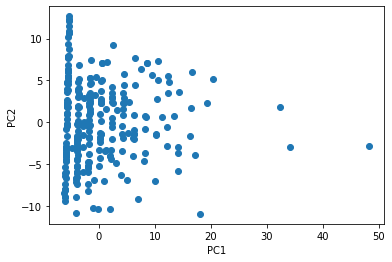

In [20]:
#visulaized PCA
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Calculate the total percentage of variance captured by the 2 PCA components. Also, report the strength of each PCA component

In [21]:
print(pca.explained_variance_ratio_)

[0.57925317 0.27414221]


In [22]:
total_ratio = 0.57925317 + 0.27414221
print(total_ratio)

0.85339538


In [23]:
#strength of each of the 2 principal components

print (pca.singular_values_)

[118.75989346  81.70028032]


# SVM

In [24]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

# Model Evaluation(without gridsearch)

Create a confusion matrix and a classification report.

In [25]:
predictions_svm = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions_svm))

[[26 12]
 [ 7 74]]


In [26]:
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        38
           1       0.86      0.91      0.89        81

    accuracy                           0.84       119
   macro avg       0.82      0.80      0.81       119
weighted avg       0.84      0.84      0.84       119



In [27]:
score_svm = svc_model.score(X_test, y_test)
print("Using SVM on Test Dataset is", score_svm*100, "%")

Using SVM on Test Dataset is 84.03361344537815 %


# SVM with Gridsearch 

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [29]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[27 11]
 [ 7 74]]


In [30]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75        38
           1       0.87      0.91      0.89        81

    accuracy                           0.85       119
   macro avg       0.83      0.81      0.82       119
weighted avg       0.85      0.85      0.85       119



In [31]:
score_svm_grid = grid.score(X_test, y_test)
print("Using SVM with gridsearch Accuracy on Test Dataset is", score_svm_grid*100, "%")

Using SVM with gridsearch Accuracy on Test Dataset is 84.87394957983193 %


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='newton-cg', random_state=0)


# fit the model
logreg.fit(X_train, y_train)
predictions_lg = logreg.predict(X_test)
print(confusion_matrix(y_test,predictions_lg))
print(classification_report(y_test,predictions_lg))

[[28 10]
 [ 5 76]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        38
           1       0.88      0.94      0.91        81

    accuracy                           0.87       119
   macro avg       0.87      0.84      0.85       119
weighted avg       0.87      0.87      0.87       119



In [33]:
score_LR = logreg.score(X_test, y_test)
print("Using Logistic Regression Model- Accuracy on Test Dataset is", score_LR*100, "%")

Using Logistic Regression Model- Accuracy on Test Dataset is 87.39495798319328 %


# KNN model

the max score:0.9166666666666666 the best value of K:38


<function matplotlib.pyplot.show(*args, **kw)>

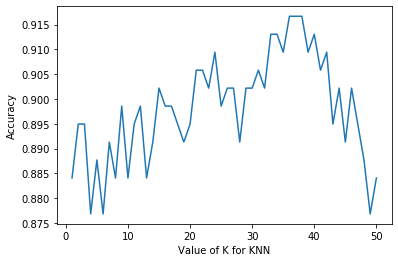

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Find the best value of K
k_scores = []
k_range = range(1, 51)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
    scores = cross_val_score(knn, X_train, y_train, cv = 6, scoring='accuracy')
    k_scores.append(scores.mean())

score_max = max(k_scores)
print('the max score:{}'.format(score_max), 
     'the best value of K:{}'.format(k_scores.index(score_max)+1))

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show

In [53]:
# KNN classifier
knn = KNeighborsClassifier(n_neighbors = 38, algorithm = 'kd_tree')
knn.fit(X_train, y_train)
knn_predicision = knn.predict(X_test)

# Model metric and Evalustion: AUC-ROC, Confusion matrix, F1-Score, Recall, Precision
report = classification_report(y_test, knn_predicision)
print(report)
confusionmatrix = confusion_matrix(y_test, knn_predicision)
print(confusionmatrix)

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        38
           1       0.86      0.93      0.89        81

    accuracy                           0.85       119
   macro avg       0.84      0.81      0.82       119
weighted avg       0.85      0.85      0.84       119

[[26 12]
 [ 6 75]]


In [54]:
score_knn = knn.score(X_test, y_test)
print("Using KNN on Test Dataset is", score_knn*100, "%")

Using KNN on Test Dataset is 84.87394957983193 %


# Random Forest Model

In [55]:
# Random Forest Classifier
# n_estimators = ?  random_state = ?
RFClassifier = RandomForestClassifier(n_estimators=15)
RFClassifier.fit(X_train, y_train)
RF_predicision = RFClassifier.predict(X_test)

#Model metric and Evalustion: AUC-ROC, Confusion matrix, F1-Score, Recall, Precision
report = classification_report(y_test, RF_predicision)
print(report)
confusionmatrix = confusion_matrix(y_test, RF_predicision)
print(confusionmatrix)

              precision    recall  f1-score   support

           0       0.78      0.66      0.71        38
           1       0.85      0.91      0.88        81

    accuracy                           0.83       119
   macro avg       0.82      0.79      0.80       119
weighted avg       0.83      0.83      0.83       119

[[25 13]
 [ 7 74]]


In [56]:
score_rf = RFClassifier.score(X_test, y_test)
print("Using Random Forest on Test Dataset is", score_rf*100, "%")

Using Random Forest on Test Dataset is 83.19327731092437 %


# Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26 12]
 [11 70]]


In [58]:
score_gnb = gnb.score(X_test, y_test)
print("Using Naive Bayes Accuracy on Test Dataset is", score_gnb*100, "%")

Using Naive Bayes Accuracy on Test Dataset is 80.67226890756302 %


# Cart(Decision tree)

In [59]:
from sklearn.tree import DecisionTreeClassifier
gini = DecisionTreeClassifier(criterion='gini',max_depth=10, random_state=5315)
gini.fit(X_train, y_train)
y_pred2 = gini.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[26 12]
 [ 9 72]]


In [60]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        38
           1       0.86      0.89      0.87        81

    accuracy                           0.82       119
   macro avg       0.80      0.79      0.79       119
weighted avg       0.82      0.82      0.82       119



In [61]:
score_gini = gini.score(X_test, y_test)
print("Using CART- Accuracy on Test Dataset is", score_gini*100, "%")

Using CART- Accuracy on Test Dataset is 82.35294117647058 %


## **QDA(Quadratic Discriminant Analysis)**

In [62]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

QDA = QuadraticDiscriminantAnalysis()

QDA_pre = QDA.fit(X_train, y_train).predict(X_test)

# get the confusion_matrix
QDA_cm = confusion_matrix(y_test, QDA_pre)
print(QDA_cm)

[[18 20]
 [12 69]]


In [63]:
# get the classification_report
print(classification_report(y_test, QDA_pre))

              precision    recall  f1-score   support

           0       0.60      0.47      0.53        38
           1       0.78      0.85      0.81        81

    accuracy                           0.73       119
   macro avg       0.69      0.66      0.67       119
weighted avg       0.72      0.73      0.72       119



In [64]:
# get the accurancy of QDA model
QDA_score = QDA.score(X_test, y_test)
print('The Accuracy of using QDA model is', QDA_score * 100, '%')

The Accuracy of using QDA model is 73.10924369747899 %


## **PLA(Percetron Learning Algorithm)**

In [65]:
from sklearn.linear_model import Perceptron

PLA = Perceptron(fit_intercept=True, shuffle=False)

PLA_pre = PLA.fit(X_train, y_train).predict(X_test)

# get the confusion_matrix
PLA_cm = confusion_matrix(y_test, PLA_pre)
print(PLA_cm)

[[17 21]
 [ 5 76]]


In [66]:
# get the classification_report
print(classification_report(y_test, PLA_pre))

              precision    recall  f1-score   support

           0       0.77      0.45      0.57        38
           1       0.78      0.94      0.85        81

    accuracy                           0.78       119
   macro avg       0.78      0.69      0.71       119
weighted avg       0.78      0.78      0.76       119



In [67]:
# get the accurancy of PLA model
PLA_score = PLA.score(X_test, y_test)
print('The Accuracy of using PLA model is', PLA_score * 100, '%')

The Accuracy of using PLA model is 78.15126050420169 %


# Model Accuracy Comparison

In [68]:
dictionary = {'SVM': 84.03, 'SVM with Gridsearch': 84.87, 'Logistic Regression': 87.39,
                 'KNN': 84.03,'Random Forest': 89.92,'PLA': 78.15, 'CART': 82.35, 'QDA':73.11 ,'Naive Bayes': 80.67}

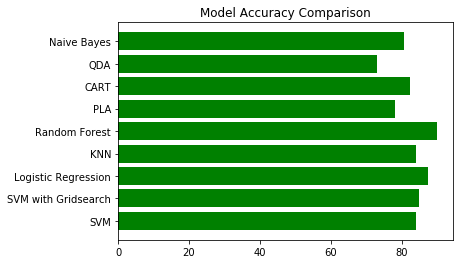

In [69]:
plt.barh(list(dictionary.keys()), dictionary.values(), color='g')
plt.title('Model Accuracy Comparison')
plt.show()

# We can see that Random Forest performed best across all algorithms.
